<a href="https://colab.research.google.com/github/ptah0414/stock-coin-price-prediction/blob/main/22_05_18_price_prediction_by_google_trends_and_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytrends
from datetime import datetime
import pandas as pd
from pytrends.request import TrendReq

In [ ]:
keyword = ["bitcoin"]

In [ ]:
startdate = "2017-09-25"

In [ ]:
enddate = str(datetime.today()).split(" ")[0]
enddate

'2022-06-01'

In [ ]:
timerange = startdate + " " + enddate

In [ ]:
result = pd.DataFrame()

In [ ]:
pytrends = TrendReq()

In [ ]:
pytrends.build_payload(kw_list = keyword, timeframe = timerange)
data = pytrends.interest_over_time()
data

,bitcoin,isPartial
date,,
2017-10-01,12,False
2017-10-08,18,False
2017-10-15,19,False
2017-10-22,20,False
2017-10-29,26,False
...,...,...
2022-05-01,19,False
2022-05-08,40,False
2022-05-15,27,False


In [ ]:
import matplotlib 

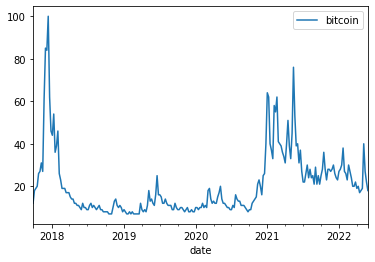

In [ ]:
data.plot()

In [ ]:
data.tail()

,bitcoin,isPartial
date,,
2022-05-01,19,False
2022-05-08,40,False
2022-05-15,27,False
2022-05-22,22,False
2022-05-29,18,True


In [ ]:
data = data[["bitcoin"]]
data

,bitcoin
date,
2017-10-01,12
2017-10-08,18
2017-10-15,19
2017-10-22,20
2017-10-29,26
...,...
2022-05-01,19
2022-05-08,40
2022-05-15,27


In [ ]:
data = data.reset_index()

In [ ]:
data = data.rename(columns={"date": "Date", "bitcoin": "trends"})
data

,Date,trends
0,2017-10-01,12
1,2017-10-08,18
2,2017-10-15,19
3,2017-10-22,20
4,2017-10-29,26
...,...,...
239,2022-05-01,19
240,2022-05-08,40
241,2022-05-15,27
242,2022-05-22,22


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
from datetime import datetime
import pandas_datareader as pdr
import pandas as pd

In [ ]:
final = datetime.today()

In [ ]:
vix = yf.download('^VIX', interval='1d', start="2017-09-25", end=final)['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
vix = pd.DataFrame(vix)
vix

,Close
Date,
2017-09-25,10.210000
2017-09-26,10.170000
2017-09-27,9.870000
2017-09-28,9.550000
2017-09-29,9.510000
...,...
2022-05-25,28.370001
2022-05-26,27.500000
2022-05-27,25.719999


In [ ]:
vix_close = vix.rename(columns={"Close": "vix_close"})
vix_close

,vix_close
Date,
2017-09-25,10.210000
2017-09-26,10.170000
2017-09-27,9.870000
2017-09-28,9.550000
2017-09-29,9.510000
...,...
2022-05-25,28.370001
2022-05-26,27.500000
2022-05-27,25.719999


In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import pyupbit
import datetime

In [ ]:
access = "key"
secret = "key"

In [ ]:
# 로그인
upbit = pyupbit.Upbit(access, secret)

# 2017-09-25 ~ 현재 -> 약 1711개

In [ ]:
ticker = "KRW-BTC"
df = pyupbit.get_ohlcv(ticker, interval="day", count=3650)

In [ ]:
df_org = df.copy()

In [ ]:
df = df_org

In [ ]:
df.head()

,open,high,low,close,volume,value
2017-09-25 09:00:00+00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00+00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00+00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00+00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00+00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08


In [ ]:
df.reset_index(inplace=True)
df

,index,open,high,low,close,volume,value
0,2017-09-25 09:00:00+00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26 09:00:00+00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27 09:00:00+00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
3,2017-09-28 09:00:00+00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
4,2017-09-29 09:00:00+00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...,...
1706,2022-05-28 09:00:00+00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
1707,2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
1708,2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
1709,2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11


In [ ]:
df = df.rename(columns={"index": "Date"})
df

,Date,open,high,low,close,volume,value
0,2017-09-25 09:00:00+00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26 09:00:00+00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27 09:00:00+00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
3,2017-09-28 09:00:00+00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
4,2017-09-29 09:00:00+00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...,...
1706,2022-05-28 09:00:00+00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
1707,2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
1708,2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
1709,2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11


In [ ]:
df["Date"] = pd.to_datetime(df["Date"].dt.date)
df

,Date,open,high,low,close,volume,value
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...,...
1706,2022-05-28,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
1707,2022-05-29,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
1708,2022-05-30,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
1709,2022-05-31,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11


In [ ]:
vix_close[["vix_close"]]

,vix_close
Date,
2017-09-25,10.210000
2017-09-26,10.170000
2017-09-27,9.870000
2017-09-28,9.550000
2017-09-29,9.510000
...,...
2022-05-25,28.370001
2022-05-26,27.500000
2022-05-27,25.719999


In [ ]:
df = pd.merge(df, vix_close, on="Date", how="left")
df.head(20)

,Date,open,high,low,close,volume,value,vix_close
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.21
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.17
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.87
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.55
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.51
5,2017-09-30,4657000.0,4896000.0,4651000.0,4895000.0,19.998483,9.561476e+07,NaN
6,2017-10-01,4889000.0,4978000.0,4682000.0,4962000.0,27.323332,1.331325e+08,NaN
7,2017-10-02,4962000.0,5095000.0,4956000.0,5025000.0,31.728004,1.599315e+08,9.45
8,2017-10-03,5021000.0,5079000.0,4811000.0,4964000.0,11.899307,5.890130e+07,9.51
9,2017-10-04,4987000.0,5002000.0,4837000.0,4895000.0,7.038744,3.458813e+07,9.63


In [ ]:
df = df.fillna(method = "ffill")
df.head(20)

,Date,open,high,low,close,volume,value,vix_close
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.21
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.17
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.87
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.55
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.51
5,2017-09-30,4657000.0,4896000.0,4651000.0,4895000.0,19.998483,9.561476e+07,9.51
6,2017-10-01,4889000.0,4978000.0,4682000.0,4962000.0,27.323332,1.331325e+08,9.51
7,2017-10-02,4962000.0,5095000.0,4956000.0,5025000.0,31.728004,1.599315e+08,9.45
8,2017-10-03,5021000.0,5079000.0,4811000.0,4964000.0,11.899307,5.890130e+07,9.51
9,2017-10-04,4987000.0,5002000.0,4837000.0,4895000.0,7.038744,3.458813e+07,9.63


In [ ]:
df_trends = data
df_trends

,Date,trends
0,2017-10-01,12
1,2017-10-08,18
2,2017-10-15,19
3,2017-10-22,20
4,2017-10-29,26
...,...,...
239,2022-05-01,19
240,2022-05-08,40
241,2022-05-15,27
242,2022-05-22,22


In [ ]:
df = pd.merge(df, df_trends, how="outer", on="Date")
df

,Date,open,high,low,close,volume,value,vix_close,trends
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.210000,NaN
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.170000,NaN
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.870000,NaN
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.550000,NaN
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.510000,NaN
...,...,...,...,...,...,...,...,...,...
1706,2022-05-28,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10,25.719999,NaN
1707,2022-05-29,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10,25.719999,18.0
1708,2022-05-30,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11,25.719999,NaN
1709,2022-05-31,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11,26.190001,NaN


In [ ]:
df = df.fillna(method = "ffill")
df

,Date,open,high,low,close,volume,value,vix_close,trends
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.210000,NaN
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.170000,NaN
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.870000,NaN
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.550000,NaN
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.510000,NaN
...,...,...,...,...,...,...,...,...,...
1706,2022-05-28,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10,25.719999,22.0
1707,2022-05-29,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10,25.719999,18.0
1708,2022-05-30,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11,25.719999,18.0
1709,2022-05-31,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11,26.190001,18.0


In [ ]:
df = df.fillna(method = "bfill")
df

,Date,open,high,low,close,volume,value,vix_close,trends
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.210000,12.0
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.170000,12.0
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.870000,12.0
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.550000,12.0
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.510000,12.0
...,...,...,...,...,...,...,...,...,...
1706,2022-05-28,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10,25.719999,22.0
1707,2022-05-29,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10,25.719999,18.0
1708,2022-05-30,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11,25.719999,18.0
1709,2022-05-31,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11,26.190001,18.0


# Smoothing by Moving Average

이동평균선 plot

In [ ]:
df2 = df

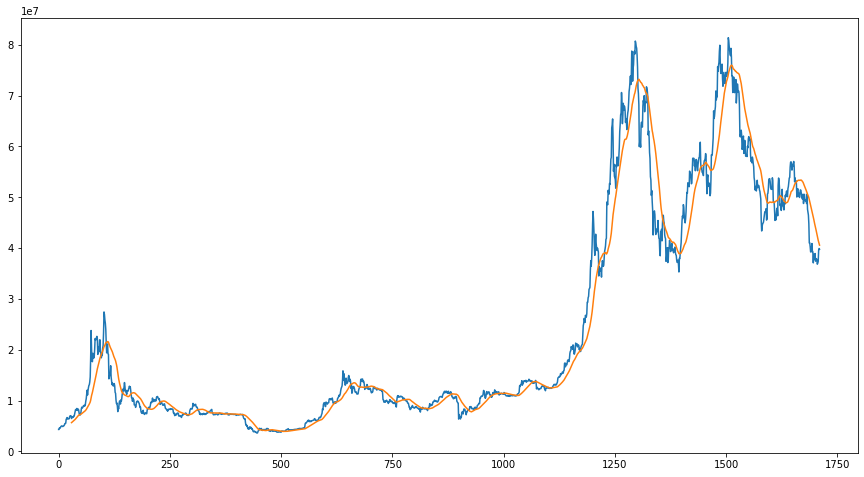

In [ ]:
df2["close"].plot(figsize=(15, 8))
df2["close"].rolling(window=30).mean().plot() # 30일 이동평균선

In [ ]:
df2["close_MA30"] = df2["close"].rolling(window=30).mean()
df2.head()

,Date,open,high,low,close,volume,value,vix_close,trends,close_MA30
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,10.21,12.0,NaN
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,10.17,12.0,NaN
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,9.87,12.0,NaN
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,9.55,12.0,NaN
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,9.51,12.0,NaN


In [ ]:
df2["close_ma5"] = df2["close"].rolling(window=5).mean()
df2["close_ma10"] = df2["close"].rolling(window=10).mean()
df2["close_ma20"] = df2["close"].rolling(window=20).mean()
df2["close_ma60"] = df2["close"].rolling(window=60).mean()
#df2["close_diff_ma120"] = df2["close_diff"].rolling(window=120).mean()

In [ ]:
df2["vix_close_ma5"] = df2["vix_close"].rolling(window=5).mean()
df2["vix_close_ma10"] = df2["vix_close"].rolling(window=10).mean()
df2["vix_close_ma20"] = df2["vix_close"].rolling(window=20).mean()
df2["vix_close_ma60"] = df2["vix_close"].rolling(window=60).mean()
#df2["vix_close_diff_ma120"] = df2["vix_close"].rolling(window=120).mean()


In [ ]:
df = df2[["close_ma5", "close_ma10", "close_ma20", "close_ma60", 
          "vix_close_ma5", "vix_close_ma10", "vix_close_ma20", "vix_close_ma60",
          "trends", "close"]]
df.head(30)

,close_ma5,close_ma10,close_ma20,close_ma60,vix_close_ma5,vix_close_ma10,vix_close_ma20,vix_close_ma60,trends,close
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4322000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4321000.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4657000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,4586000.0
4,4508600.0,NaN,NaN,NaN,9.862,NaN,NaN,NaN,12.0,4657000.0
5,4623200.0,NaN,NaN,NaN,9.722,NaN,NaN,NaN,12.0,4895000.0
6,4751400.0,NaN,NaN,NaN,9.590,NaN,NaN,NaN,12.0,4962000.0
7,4825000.0,NaN,NaN,NaN,9.506,NaN,NaN,NaN,12.0,5025000.0
8,4900600.0,NaN,NaN,NaN,9.498,NaN,NaN,NaN,12.0,4964000.0
9,4948200.0,4728400.0,NaN,NaN,9.522,9.692,NaN,NaN,12.0,4895000.0


# 1711 - 60 = 1651

In [ ]:
df = df.dropna()
df_drop = df
df.head()

,close_ma5,close_ma10,close_ma20,close_ma60,vix_close_ma5,vix_close_ma10,vix_close_ma20,vix_close_ma60,trends,close
59,8953200.0,8657600.0,8277800.0,6.798617e+06,10.314,11.091,10.7065,10.209167,27.0,8943000.0
60,9038200.0,8818000.0,8320250.0,6.879833e+06,9.962,10.899,10.7330,10.200167,27.0,9195000.0
61,9209000.0,8970900.0,8391550.0,6.972467e+06,9.766,10.553,10.7595,10.191833,27.0,9879000.0
62,9489000.0,9134300.0,8505750.0,7.067250e+06,9.754,10.344,10.7730,10.188500,61.0,10344000.0
63,9935000.0,9411600.0,8659300.0,7.179383e+06,9.752,10.188,10.7720,10.193833,61.0,11314000.0


In [ ]:
len(df)

1652

In [ ]:
# df[["close_diff_ma5", "close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120"]].plot.line()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# inverse transform
def restore(row):
  return row * (max(df_drop["close"]) - min(df_drop["close"])) + min(df_drop["close"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ["close_ma5", "close_ma10", "close_ma20", "close_ma60", 
              "vix_close_ma5", "vix_close_ma10", "vix_close_ma20", "vix_close_ma60",
              "trends", "close"]
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('close', 1), df['close'], test_size=0.2, random_state=0, shuffle=False)

# train set 80% ->1651 * 0.8 = 1320.8 -> 1321 data


In [ ]:
x_train.shape, y_train.shape

((1321, 9), (1321,))

# test set 20% -> 1651 * 0.2 = 330.2 -> 331 data

In [ ]:
x_test.shape, y_test.shape

((331, 9), (331,))

In [ ]:
x_train.tail()

,close_ma5,close_ma10,close_ma20,close_ma60,vix_close_ma5,vix_close_ma10,vix_close_ma20,vix_close_ma60,trends
1316,0.480845,0.475382,0.516950,0.647938,0.099921,0.106818,0.128947,0.197731,0.215054
1317,0.479418,0.477601,0.515577,0.640574,0.098239,0.104156,0.128427,0.196374,0.215054
1318,0.480311,0.479236,0.512506,0.634180,0.096129,0.102063,0.127906,0.194527,0.215054
1319,0.478787,0.480374,0.508671,0.627496,0.093224,0.100556,0.126721,0.192818,0.161290
1320,0.475717,0.483524,0.503918,0.620444,0.090901,0.099635,0.124971,0.191428,0.161290


In [ ]:
y_train.tail()

1316    0.458976
1317    0.460545
1318    0.471562
1319    0.479906
1320    0.461367
Name: close, dtype: float64

In [ ]:
len(y_train)

1321

In [ ]:
x_test.tail()

,close_ma5,close_ma10,close_ma20,close_ma60,vix_close_ma5,vix_close_ma10,vix_close_ma20,vix_close_ma60,trends
1647,0.443601,0.455358,0.481895,0.622398,0.277411,0.314392,0.350283,0.412619,0.16129
1648,0.442426,0.453484,0.479394,0.617761,0.266006,0.308314,0.342178,0.415296,0.11828
1649,0.446671,0.455877,0.478361,0.613952,0.257904,0.302103,0.335652,0.417457,0.11828
1650,0.452613,0.458401,0.478107,0.609989,0.253898,0.296678,0.329934,0.420205,0.11828
1651,0.460340,0.459531,0.478476,0.606067,0.254907,0.291019,0.324800,0.422894,0.11828


In [ ]:
y_test.tail()

1647    0.429587
1648    0.434035
1649    0.461933
1650    0.466728
1651    0.464851
Name: close, dtype: float64

In [ ]:
len(y_test)

331

In [ ]:
df2 = df_org
df2.tail()

,index,open,high,low,close,volume,value
1706,2022-05-28 09:00:00+00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
1707,2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
1708,2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
1709,2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
1710,2022-06-01 09:00:00+00:00,39927000.0,40150000.0,39514000.0,39777000.0,1887.730602,7.522128e+10


TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     40/Unknown - 3s 14ms/step - loss: 0.0184 - mse: 0.0368
Epoch 1: val_loss improved from inf to 0.02423, saving model to tmp/ckeckpointer.ckpt
41/41 [==============================] - 5s 54ms/step - loss: 0.0182 - mse: 0.0364 - val_loss: 0.0242 - val_mse: 0.0485
Epoch 2/50
40/41 [============================>.] - ETA: 0s - loss: 0.0023 - mse: 0.0046
Epoch 2: val_loss improved from 0.02423 to 0.00136, saving model to tmp/ckeckpointer.ckpt
41/41 [==============================] - 1s 26ms/step - loss: 0.0023 - mse: 0.0046 - val_loss: 0.0014 - val_mse: 0.0027
Epoch 3/50
38/41 [==========================>...] - ETA: 0s - loss: 5.8427e-04 - mse: 0.0012
Epoch 3: val_loss improved from 0.00136 to 0.00120, saving model to tmp/ckeckpointer.ckpt
41/41 [==============================] - 2s 30ms/step - loss: 5.9275e-04 - mse: 0.0012 - val_loss: 0.0012 - val_mse: 0.0024
Epoch 4/50
40/41 [============================>.] - ETA: 0s - loss: 4.7299e-04 - mse: 9.4598e-04
Epoch 4: val_loss im

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

pred: test set - 20(window size)  = 331 - 20 = 311


In [ ]:
pred.shape

(311, 1)

예측 데이터 시각화


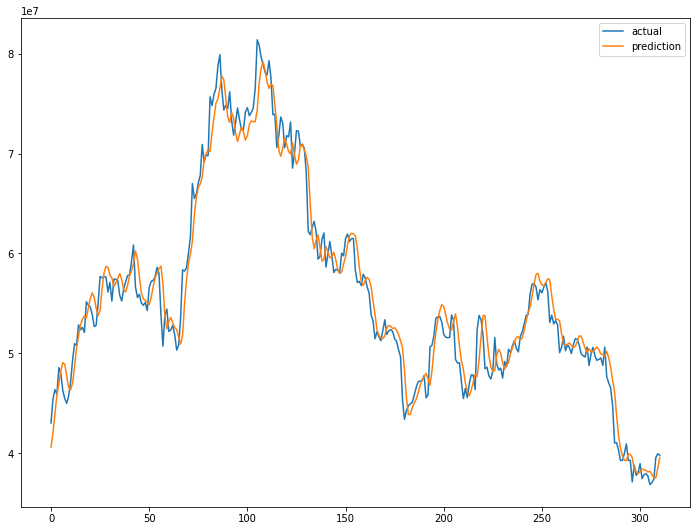

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(restore(np.asarray(y_test)[20:]), label='actual')
plt.plot(restore(pred), label='prediction')
plt.legend()
plt.show()

In [ ]:
df_actu = df_org[-len(pred):]
df_actu.tail()

,index,open,high,low,close,volume,value
1706,2022-05-28 09:00:00+00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
1707,2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
1708,2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
1709,2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
1710,2022-06-01 09:00:00+00:00,39927000.0,40150000.0,39514000.0,39777000.0,1887.730602,7.522128e+10


In [ ]:
df_actu["pred"] = restore(pred)
df_actu

,index,open,high,low,close,volume,value,pred
1400,2021-07-26 09:00:00+00:00,41054000.0,46800000.0,40864000.0,43001000.0,18124.954521,8.034095e+11,40592004.0
1401,2021-07-27 09:00:00+00:00,43021000.0,45506000.0,42050000.0,45409000.0,10710.880945,4.673854e+11,42037272.0
1402,2021-07-28 09:00:00+00:00,45447000.0,47494000.0,45000000.0,46350000.0,11869.722720,5.477175e+11,43954560.0
1403,2021-07-29 09:00:00+00:00,46350000.0,46996000.0,45529000.0,45907000.0,5904.864240,2.721642e+11,45825564.0
1404,2021-07-30 09:00:00+00:00,45936000.0,48661000.0,44450000.0,48555000.0,9277.569455,4.262848e+11,46951168.0
...,...,...,...,...,...,...,...,...
1706,2022-05-28 09:00:00+00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10,37863268.0
1707,2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10,37531848.0
1708,2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11,37496052.0
1709,2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11,38480388.0


In [ ]:
df_actu = df_actu[["close", "pred"]]
df_actu.tail()

,close,pred
1706,37034000.0,37863268.0
1707,37380000.0,37531848.0
1708,39550000.0,37496052.0
1709,39923000.0,38480388.0
1710,39777000.0,39551304.0
